In [3]:
import numpy as np
import pandas as pd
import os
from scipy import ndimage
import scipy
import matplotlib.pyplot as plt
#print os.listdir('.')

In [4]:
train_data = './' + 'train/'
test_data = './' + 'test1/' 
train_imgs = os.listdir(train_data)
test_imgs = os.listdir(test_data)
print len(train_imgs)
print len(test_imgs)

25000
12500


In [53]:
#runs 5-6 minutes
#image = np.array(ndimage.imread(fname, flatten=False))
num_px = 64
x_train = np.zeros((num_px*num_px*3,len(train_imgs)))
y_train = np.zeros((1,len(train_imgs)))
for i in range(0,len(train_imgs)) :
    image = np.array(ndimage.imread(train_data + train_imgs[i]))
    image = scipy.misc.imresize(image, size=(num_px,num_px))
    image = image.reshape((1,num_px*num_px*3)).T
    image = image/255.0
    
    image = image.reshape((num_px*num_px*3,1))
    for j in range(0,num_px*num_px*3) :
        x_train[j][i] = image[j][0]
        
    #print image.shape
    
    
    if 'dog' in train_imgs[i] :
        y_train[0][i] = 1
    else :
        y_train[0][i] = 0
    #if i == 3 :
     #   break
#print x_train[:,2]
print x_train.shape

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(12288, 25000)


In [54]:
#runs 4 minutes
x_test = np.zeros((num_px*num_px*3,len(test_imgs)))
y_test = np.zeros((1,len(test_imgs)))
num_px = 64
for i in range(0,len(test_imgs)) :
    image = np.array(ndimage.imread(test_data + test_imgs[i]))
    image = scipy.misc.imresize(image, size=(num_px,num_px))
    image = image.reshape((1,num_px*num_px*3)).T
    image = image/255.0
    for j in range(0,num_px*num_px*3) :
        x_test[j][i] = image[j][0]
print x_test.shape

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


(12288, 12500)


In [55]:
def sigmoid(x) :
    z = 1 / (1 + np.exp(-x))
    return z

In [56]:
def initialize(dims) :
    w = np.zeros((dims,1))
    b = 0
    params = [w,b]
    return w,b

In [74]:
def propagate(w,b,X,Y) :
    m = X.shape[1]
    m = float(m)
    #print m
    #print w.T.shape
    #print X.shape
    z = np.dot(w.T,X) + b
    #print z
    A = sigmoid(z)
    #print A
    J = (-1/m) * (np.sum(Y*np.log(A) + (1-Y)*(np.log(1-A))))
    dz = A-Y
    dw = (1/m) * np.dot(X,dz.T)
    db = (1/m)* np.sum(dz)
    return dw,db,J

In [75]:
def optimize(w,b,x_train,y_train,num_iterations,learning_rate) :
    for i in range(0,num_iterations) :
        dw,db,J = propagate(w,b,x_train,y_train)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        if i%10 == 0 :
            print 'cost after ith iteration :', i , ' cost : ', J
    print i
    return w,b,J
        


In [76]:
def predict(w,b,x_test) :
    y_test = np.zeros((1,x_test.shape[1]))
    A = sigmoid(np.dot(w.T,x_test) + b)
    for i in range(0,A.shape[1]) :
        if A[0][i] > 0.5 :
            y_test[0,i] = 1
        else :
            y_test[0,i] = 0
    return y_test

In [77]:
def model(x_train,y_train,x_test,num_iterations,learning_rate) :
    w,b = initialize(x_train.shape[0])
    w,b,J = optimize(w,b,x_train,y_train,num_iterations,learning_rate)
    print w,b
    print 'cost ' , J
    y_test = predict(w,b,x_test)
    y_train_pred = predict(w,b,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train_pred - y_train)) * 100))
    return y_test

In [81]:
final_pred = model(x_train,y_train,x_test,1000,0.001)


cost after ith iteration : 0  cost :  0.6931471805599453
cost after ith iteration : 10  cost :  0.6912402332910307
cost after ith iteration : 20  cost :  0.6897045746798579
cost after ith iteration : 30  cost :  0.6884095692505897
cost after ith iteration : 40  cost :  0.6872880181029412
cost after ith iteration : 50  cost :  0.6862954946862392
cost after ith iteration : 60  cost :  0.6854021072144606
cost after ith iteration : 70  cost :  0.6845873103149825
cost after ith iteration : 80  cost :  0.6838366303419879
cost after ith iteration : 90  cost :  0.6831395895652055
cost after ith iteration : 100  cost :  0.6824883821086792
cost after ith iteration : 110  cost :  0.6818770225588244
cost after ith iteration : 120  cost :  0.6813007929995081
cost after ith iteration : 130  cost :  0.6807558794824128
cost after ith iteration : 140  cost :  0.6802391295505348
cost after ith iteration : 150  cost :  0.6797478877421806
cost after ith iteration : 160  cost :  0.6792798818142666
cost aft

In [89]:
print np.unique(final_pred,return_counts=True)

(array([0., 1.]), array([5943, 6557]))


In [94]:
id_arr = np.zeros((1,len(test_imgs)))
for i in range(0,len(test_imgs)) :
    id_arr[0][i] = test_imgs[i].replace('.jpg','').replace('.','')
print id_arr

[[9733.   63. 6400. ... 7707. 6419. 1376.]]


In [101]:
print final_pred.shape
print id_arr.shape


(1, 12500)
(1, 12500)


In [43]:

#with open('sub1.csv','w') as fh :
#    for i in range(0,id_arr.shape[1]) :
#        fh.write(str(int(final_pred[0][i])))
#        fh.write('\n')
        

In [7]:
final_pred = np.zeros((1,len(test_imgs)))
i = 0
with open('sub1.csv','r') as fh :
    for line in fh :
        line = line.split(',')
        final_pred[0][i] = line[1]
        i = i + 1

dog


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


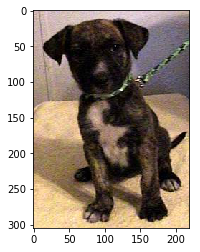

In [42]:
for i in range(0,len(test_imgs)) :
    i = 120
    #print final_pred[0][i]
    fname = test_data + test_imgs[i]
    image = np.array(ndimage.imread(fname, flatten=False))
    plt.imshow(image)
    if final_pred[0][i] == 0.0 :
        print 'cat'
    else :
        print 'dog'
    break